<a href="https://colab.research.google.com/github/fernanda0402/Doutorado/blob/main/Teste_chi%5E2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
from scipy.stats import linregress
from scipy.interpolate import interp1d

In [15]:
x = np.array([2, 6, 7])
y = np.array([3.5, 5.2, 8])
e = np.array([0.4, 0.8, 1.2])

def f(x, a, b):
  return b*x + a

In [17]:
# ajuste da função

popt, pcov = curve_fit(f, x, y, sigma=e, p0=[0., 0.], bounds=([0., 0.], [10., 10.]), method='trf')

p1 = popt[0]
p2 = popt[1]

print(popt[0])
print(popt[1])

1.3694172146228669e-10
2.3651120545729143e-10


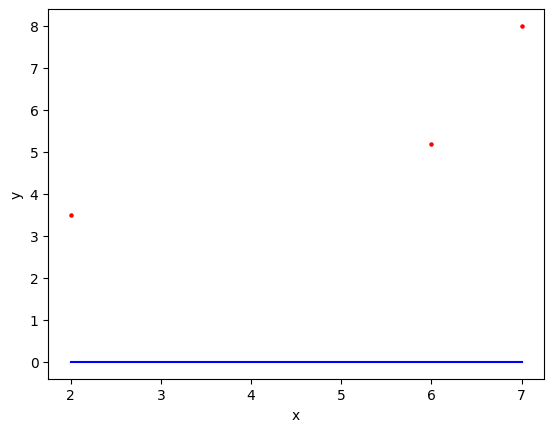

In [22]:
plt.scatter(x, y, s=5, color="red")
plt.plot(x, f(x, *popt), color='blue')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Outro teste:

In [24]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([-3,2,7,12,17,22,27,32,37,42])
e = np.array([0.4, 0.8, 1.2, 1.2, 1.5,2.3,2.8,3,3.7,4.1])

def g(x, a, b):
  return b*x + a

1.1689742505879482e-10
2.404082512759931e-10


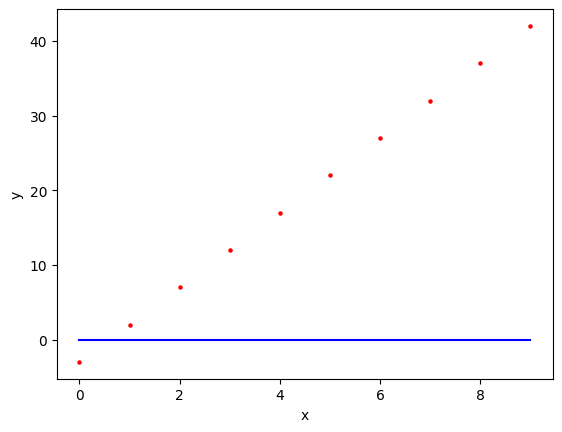

In [26]:
# ajuste da função

popt, pcov = curve_fit(g, x, y, sigma=e, p0=[0., 0.], bounds=([0., 0.], [10., 10.]), method='trf')

p1 = popt[0]
p2 = popt[1]

print(popt[0])
print(popt[1])

plt.scatter(x, y, s=5, color="red")
plt.plot(x, g(x, *popt), color='blue')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Outro teste:

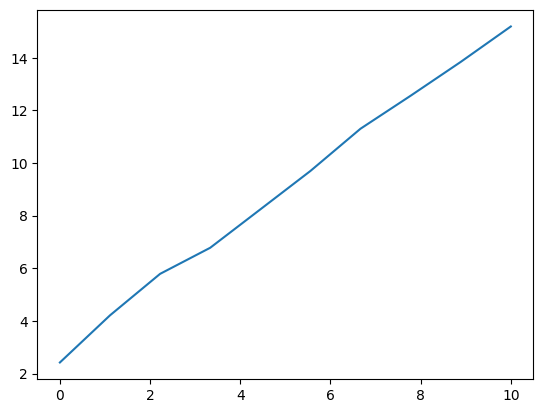

In [45]:
def func(x, a, b):
  return a + b*x

xdata = np.linspace(0, 10, 10)
y = func(xdata, 2.5, 1.3)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise

plt.plot(xdata, ydata)
plt.show()

2.696735469029618
1.2609654888764592


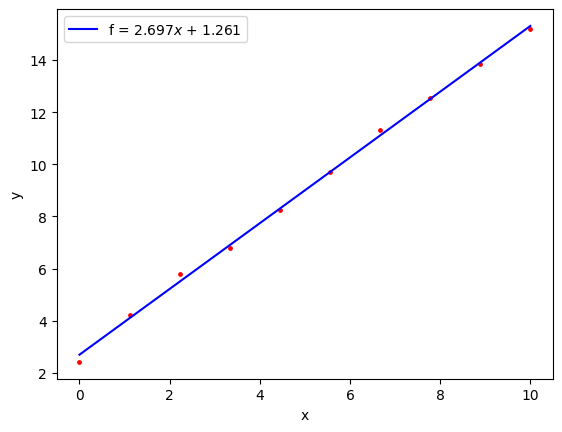

In [46]:
popt, pcov = curve_fit(func, xdata, ydata)

p1 = popt[0]
p2 = popt[1]

print(popt[0])
print(popt[1])

plt.scatter(xdata, ydata, s=6, color="red")
plt.plot(xdata, func(xdata, *popt), color='blue', label=r'f = '+str(np.round(p1, 3))+ '$x$ + ' +str(np.round(p2, 3))  )
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [54]:
print(np.asarray(xdata).shape)
print(np.asarray(func).shape)

(10,)
()


In [72]:
# interpolação da solução
func_interp = interp1d(xdata, ydata)

# valores de x desejados
xdata = np.linspace(0, 10, 10)

# valores de y correspondentes
func = func_interp(1/(1+xdata))

# impressão dos valores de y
for i in range(len(func)):
    print(f"x = {i}: y = {func[i]:.3f}")

x = 0: y = 3.478
x = 1: y = 3.505
x = 2: y = 3.513
x = 3: y = 3.517
x = 4: y = 3.519
x = 5: y = 3.521
x = 6: y = 3.522
x = 7: y = 3.523
x = 8: y = 3.523
x = 9: y = 3.524


In [74]:
# pegar valores específicos da função (que é o y) de acordo com os valores específicos de x

# valores de y correspondentes
y = np.zeros_like(x)
for i in range(len(x)):
    y[i] = func_interp(1/(1+xdata[i]))

# impressão dos valores de y
for i in range(len(y)):
    print(f"x = {xdata[i]:.1f}: y = {y[i]:.3f}")

x = 0.0: y = 3.000
x = 1.1: y = 3.000
x = 2.2: y = 3.000
x = 3.3: y = 3.000
x = 4.4: y = 3.000
x = 5.6: y = 3.000
x = 6.7: y = 3.000
x = 7.8: y = 3.000
x = 8.9: y = 3.000
x = 10.0: y = 3.000
